In [54]:
#import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt

In [55]:
# MORTGAGE30US.csv (Measure mortgage interest rates | weekly)
# CPIAUCSL.csv (US Consumer price index - measure inflation | monthly)
# RRVRUSQ156N.csv (Measure the percentage of rental property that are available | quarterly)

# create a list containing federal documents
federal_files = ["MORTGAGE30US.csv", "CPIAUCSL.csv", "RRVRUSQ156N.csv"]

# Use pandas read_csv to iterate through each file.
# Read each file and parse the date and to use the date as the index.
datafs = [pd.read_csv(file, parse_dates=True, index_col=0) for file in federal_files]

In [56]:
#Weekly Dataset from 1971 - 2024
datafs[0].index[0]

Timestamp('1971-04-02 00:00:00')

In [57]:
datafs[0].describe()

,MORTGAGE30US
count,2770.000000
mean,7.731509
std,3.240299
min,2.650000
25%,5.210000
50%,7.380000
75%,9.437500
max,18.630000


In [58]:
datafs[1].describe()

,CPIAUCSL
count,927.000000
mean,119.645063
std,85.400517
min,21.480000
25%,32.315000
50%,107.900000
75%,191.650000
max,312.230000


In [59]:
datafs[0].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2770 entries, 1971-04-02 to 2024-04-25
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MORTGAGE30US  2770 non-null   float64
dtypes: float64(1)
memory usage: 43.3 KB


In [60]:
datafs[1].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 927 entries, 1947-01-01 to 2024-03-01
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CPIAUCSL  927 non-null    float64
dtypes: float64(1)
memory usage: 14.5 KB


In [61]:
datafs[0]

,MORTGAGE30US
DATE,
1971-04-02,7.33
1971-04-09,7.31
1971-04-16,7.31
1971-04-23,7.31
1971-04-30,7.29
...,...
2024-03-28,6.79
2024-04-04,6.82
2024-04-11,6.88


In [62]:
#Monthly Dataset from 1947 - 2024
datafs[1]

,CPIAUCSL
DATE,
1947-01-01,21.480
1947-02-01,21.620
1947-03-01,22.000
1947-04-01,22.000
1947-05-01,21.950
...,...
2023-11-01,308.024
2023-12-01,308.742
2024-01-01,309.685


In [63]:
#Quarterly Dataset from 1956 - 2024
datafs[2]

,RRVRUSQ156N
DATE,
1956-01-01,6.2
1956-04-01,5.9
1956-07-01,6.3
1956-10-01,5.8
1957-01-01,5.3
...,...
2022-10-01,5.8
2023-01-01,6.4
2023-04-01,6.3


In [64]:
#Use pandas concatenate option to combine all columns for federal dataframes in each file in array together.
federal_data = pd.concat(datafs, axis=1)
federal_data

,MORTGAGE30US,CPIAUCSL,RRVRUSQ156N
DATE,,,
1947-01-01,NaN,21.48,NaN
1947-02-01,NaN,21.62,NaN
1947-03-01,NaN,22.00,NaN
1947-04-01,NaN,22.00,NaN
1947-05-01,NaN,21.95,NaN
...,...,...,...
2024-03-28,6.79,NaN,NaN
2024-04-04,6.82,NaN,NaN
2024-04-11,6.88,NaN,NaN


In [65]:
#Use forward fill to fill in missing data in between data. (ex. 1, 2, NaN, NaN, 4 --> 1, 2, 2, 2, 4)
#Use data we already know, instead of pulling data from the future
federal_data = federal_data.ffill()
federal_data.head(10)

,MORTGAGE30US,CPIAUCSL,RRVRUSQ156N
DATE,,,
1947-01-01,NaN,21.48,NaN
1947-02-01,NaN,21.62,NaN
1947-03-01,NaN,22.00,NaN
1947-04-01,NaN,22.00,NaN
1947-05-01,NaN,21.95,NaN
1947-06-01,NaN,22.08,NaN
1947-07-01,NaN,22.23,NaN
1947-08-01,NaN,22.40,NaN
1947-09-01,NaN,22.84,NaN


In [66]:
#Since we filled in most of the missing data, drop NaN values to keep data consistent (1947 - 1970 deleted)
#dataframe now contains data from all three indicators
federal_data = federal_data.dropna()
federal_data

,MORTGAGE30US,CPIAUCSL,RRVRUSQ156N
DATE,,,
1971-04-02,7.33,40.10,5.3
1971-04-09,7.31,40.10,5.3
1971-04-16,7.31,40.10,5.3
1971-04-23,7.31,40.10,5.3
1971-04-30,7.29,40.10,5.3
...,...,...,...
2024-03-28,6.79,312.23,6.6
2024-04-04,6.82,312.23,6.6
2024-04-11,6.88,312.23,6.6


In [67]:
# Metro_median_sale_price_uc_sfrcondo_week.csv (Zillow - median sale price for US houses)
# Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_month.csv (Zillow - home value)

zillow_files = ["Metro_median_sale_price_uc_sfrcondo_week.csv", "Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_month.csv"]
datafs = [pd.read_csv(file) for file in zillow_files]

In [68]:
zillow_files = ["Metro_median_sale_price_uc_sfrcondo_week.csv", "Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_month.csv"]
pd.read_csv("Metro_median_sale_price_uc_sfrcondo_week.csv")["RegionName"].head(20)

0         United States
1          New York, NY
2       Los Angeles, CA
3           Chicago, IL
4            Dallas, TX
5           Houston, TX
6        Washington, DC
7      Philadelphia, PA
8             Miami, FL
9           Atlanta, GA
10           Boston, MA
11          Phoenix, AZ
12    San Francisco, CA
13        Riverside, CA
14          Detroit, MI
15          Seattle, WA
16      Minneapolis, MN
17        San Diego, CA
18            Tampa, FL
19           Denver, CO
Name: RegionName, dtype: object

In [69]:
datafs[0]

,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-02,2008-02-09,2008-02-16,2008-02-23,2008-03-01,...,2024-01-06,2024-01-13,2024-01-20,2024-01-27,2024-02-03,2024-02-10,2024-02-17,2024-02-24,2024-03-02,2024-03-09
0,102001,0,United States,country,NaN,176500.0,171450.0,173000.0,169000.0,177000.0,...,325000.0,325000.0,325000.0,319000.0,325392.0,325000.0,339000.0,336000.0,348000.0,342500.0
1,394913,1,"New York, NY",msa,NY,395000.0,405917.0,410250.0,410000.0,387000.0,...,577500.0,565000.0,580000.0,576500.0,565000.0,560000.0,579000.0,555000.0,580000.0,600000.0
2,753899,2,"Los Angeles, CA",msa,CA,451000.0,460000.0,474000.0,482000.0,460000.0,...,870000.0,908500.0,831500.0,850000.0,871000.0,887000.0,910500.0,930000.0,940000.0,910000.0
3,394463,3,"Chicago, IL",msa,IL,227500.0,220000.0,225000.0,214750.0,227500.0,...,282000.0,290000.0,290000.0,280500.0,281250.0,280000.0,285000.0,287500.0,312500.0,300000.0
4,394514,4,"Dallas, TX",msa,TX,136500.0,129000.0,140500.0,137000.0,139177.0,...,370000.0,375322.0,360972.0,361875.0,365000.0,371475.0,385000.0,378430.0,385000.0,385000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,753912,398,"Pinehurst, NC",msa,NC,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,467500.0,440000.0,458000.0,480500.0
233,394928,410,"Ocean City, NJ",msa,NJ,NaN,NaN,NaN,NaN,NaN,...,620000.0,702500.0,772500.0,700000.0,655000.0,665000.0,580000.0,600000.0,616000.0,570000.0
234,394744,442,"Key West, FL",msa,FL,NaN,NaN,NaN,NaN,NaN,...,1315000.0,1195000.0,996500.0,1125000.0,1075000.0,789000.0,985000.0,1326000.0,942500.0,944000.0
235,395085,457,"Seneca, SC",msa,SC,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,333450.0,251000.0,280000.0


In [70]:
datafs[1]

,RegionID,SizeRank,RegionName,RegionType,StateName,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,...,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31
0,102001,0,United States,country,NaN,102789.697694,103049.939217,103601.622885,104351.865312,105161.916479,...,353640.634872,356262.355375,357085.870800,356748.578567,355613.153027,354235.494756,352081.874078,350636.799503,351690.121318,355696.229487
1,394913,1,"New York, NY",msa,NY,179596.380743,178856.580865,178684.932576,178910.659409,179777.907182,...,628172.695628,634305.247586,637038.141571,638235.028235,639271.893464,639241.206992,640361.830756,640944.434908,644510.788421,652100.187384
2,753899,2,"Los Angeles, CA",msa,CA,188228.766606,189391.933782,190272.257732,190645.410038,191297.662169,...,919426.533170,929936.596980,934882.553268,938091.463052,938967.819386,938254.947161,934470.568092,933826.222466,940735.867608,959411.775343
3,394463,3,"Chicago, IL",msa,IL,131019.144914,130419.940343,131850.332535,133549.662356,135127.044169,...,310026.007292,313894.273983,315501.489267,315410.589104,314775.197265,313176.519853,310949.043289,309748.832259,311209.933213,315995.373812
4,394514,4,"Dallas, TX",msa,TX,110372.477528,111053.984565,112113.173095,112967.688376,113478.507429,...,382932.772867,383939.188533,383199.276441,380993.803323,378333.120312,376025.635219,373315.372483,372514.011718,374497.205170,378460.756365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,753929,935,"Zapata, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,125821.257591,127663.387675,127210.162257,125380.594235,122231.845110,118495.811851,115758.607696,112106.279341,111694.242641,114378.564501
891,394743,936,"Ketchikan, AK",msa,AK,NaN,NaN,NaN,NaN,NaN,...,399748.763652,402617.809917,400036.165874,394390.752707,387229.751279,384733.818580,378347.271194,378231.120329,378924.356279,381718.718046
892,753874,937,"Craig, CO",msa,CO,67939.666569,68287.852387,69087.433951,69321.217969,70470.343646,...,281140.320620,284448.197610,285114.275990,285994.410948,286361.975721,283928.506371,280350.547608,277441.285953,277484.859647,278787.023657
893,395188,938,"Vernon, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,99354.530238,99047.488658,97709.840251,95700.639004,94191.157814,90993.517394,89440.579535,90063.072944,89464.852820,90856.415640


In [71]:
#Pick the row at index 1, which is NY and drop the first 5 columns
datafs = [pd.DataFrame(df.iloc[1,5:]) for df in datafs]

In [72]:
datafs[0]

,1
2008-02-02,395000.0
2008-02-09,405917.0
2008-02-16,410250.0
2008-02-23,410000.0
2008-03-01,387000.0
...,...
2024-02-10,560000.0
2024-02-17,579000.0
2024-02-24,555000.0
2024-03-02,580000.0


In [73]:
datafs[1]

,1
1996-02-29,179596.380743
1996-03-31,178856.580865
1996-04-30,178684.932576
1996-05-31,178910.659409
1996-06-30,179777.907182
...,...
2023-11-30,639241.206992
2023-12-31,640361.830756
2024-01-31,640944.434908
2024-02-29,644510.788421


In [74]:
#Zillow dataframe index
datafs[1].index[0]

'1996-02-29'

In [75]:
#Since home value data comes out monthly and home price data comes out weekly
#Add a column to both dataframes, so we can merge data together

for df in datafs:
    df.index = pd.to_datetime(df.index) #convert index (string) to datetime
    df["month"] = df.index.to_period("M")

In [76]:
datafs[0]

,1,month
2008-02-02,395000.0,2008-02
2008-02-09,405917.0,2008-02
2008-02-16,410250.0,2008-02
2008-02-23,410000.0,2008-02
2008-03-01,387000.0,2008-03
...,...,...
2024-02-10,560000.0,2024-02
2024-02-17,579000.0,2024-02
2024-02-24,555000.0,2024-02
2024-03-02,580000.0,2024-03


In [77]:
datafs[1]

,1,month
1996-02-29,179596.380743,1996-02
1996-03-31,178856.580865,1996-03
1996-04-30,178684.932576,1996-04
1996-05-31,178910.659409,1996-05
1996-06-30,179777.907182,1996-06
...,...,...
2023-11-30,639241.206992,2023-11
2023-12-31,640361.830756,2023-12
2024-01-31,640944.434908,2024-01
2024-02-29,644510.788421,2024-02


In [78]:
#Merge data on added month column
price_data = datafs[0].merge(datafs[1], on="month")

In [79]:
price_data.index = datafs[0].index
price_data

,1_x,month,1_y
2008-02-02,395000.0,2008-02,450341.819589
2008-02-09,405917.0,2008-02,450341.819589
2008-02-16,410250.0,2008-02,450341.819589
2008-02-23,410000.0,2008-02,450341.819589
2008-03-01,387000.0,2008-03,445156.800352
...,...,...,...
2024-02-10,560000.0,2024-02,644510.788421
2024-02-17,579000.0,2024-02,644510.788421
2024-02-24,555000.0,2024-02,644510.788421
2024-03-02,580000.0,2024-03,652100.187384


In [80]:
#change the column names for 1_x to price and 1_y to value
#drop the month column
del price_data["month"]
price_data.columns=["price", "value"]
price_data

,price,value
2008-02-02,395000.0,450341.819589
2008-02-09,405917.0,450341.819589
2008-02-16,410250.0,450341.819589
2008-02-23,410000.0,450341.819589
2008-03-01,387000.0,445156.800352
...,...,...
2024-02-10,560000.0,644510.788421
2024-02-17,579000.0,644510.788421
2024-02-24,555000.0,644510.788421
2024-03-02,580000.0,652100.187384


In [81]:
#Since the dates for federal data comes out 2 days before Zillow, we need to adjust date to match
#for federal df add 2 days to date
from datetime import timedelta

federal_data.index = federal_data.index + timedelta(days=2)
federal_data

,MORTGAGE30US,CPIAUCSL,RRVRUSQ156N
DATE,,,
1971-04-04,7.33,40.10,5.3
1971-04-11,7.31,40.10,5.3
1971-04-18,7.31,40.10,5.3
1971-04-25,7.31,40.10,5.3
1971-05-02,7.29,40.10,5.3
...,...,...,...
2024-03-30,6.79,312.23,6.6
2024-04-06,6.82,312.23,6.6
2024-04-13,6.88,312.23,6.6


In [82]:
#Since the dates are now aligned, merge data on index (date) only when both dataframe date matches
price_data = federal_data.merge(price_data, left_index=True, right_index=True)
price_data

,MORTGAGE30US,CPIAUCSL,RRVRUSQ156N,price,value
2008-02-02,5.68,212.174,10.1,395000.0,450341.819589
2008-02-09,5.67,212.687,10.1,405917.0,450341.819589
2008-02-16,5.72,212.687,10.1,410250.0,450341.819589
2008-02-23,6.04,212.687,10.1,410000.0,450341.819589
2008-03-01,6.24,212.687,10.1,387000.0,445156.800352
...,...,...,...,...,...
2024-02-10,6.64,311.054,6.6,560000.0,644510.788421
2024-02-17,6.77,311.054,6.6,579000.0,644510.788421
2024-02-24,6.90,311.054,6.6,555000.0,644510.788421
2024-03-02,6.94,311.054,6.6,580000.0,652100.187384


In [83]:
# Change the column names - so it is easier to work with
price_data.columns = ["Interest Rate", "CPI", "Rental Vacancy", "Price", "Value"]
price_data

,Interest Rate,CPI,Rental Vacancy,Price,Value
2008-02-02,5.68,212.174,10.1,395000.0,450341.819589
2008-02-09,5.67,212.687,10.1,405917.0,450341.819589
2008-02-16,5.72,212.687,10.1,410250.0,450341.819589
2008-02-23,6.04,212.687,10.1,410000.0,450341.819589
2008-03-01,6.24,212.687,10.1,387000.0,445156.800352
...,...,...,...,...,...
2024-02-10,6.64,311.054,6.6,560000.0,644510.788421
2024-02-17,6.77,311.054,6.6,579000.0,644510.788421
2024-02-24,6.90,311.054,6.6,555000.0,644510.788421
2024-03-02,6.94,311.054,6.6,580000.0,652100.187384


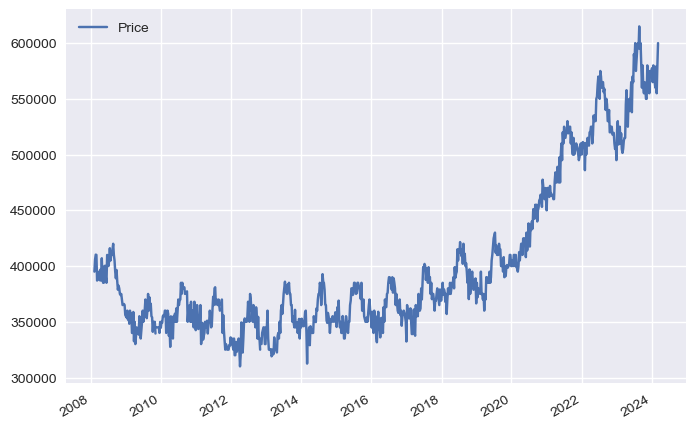

In [84]:
#Set the style
plt.style.use("seaborn-v0_8")

# Plot price of home values
price_data.plot.line(y="Price", use_index=True);

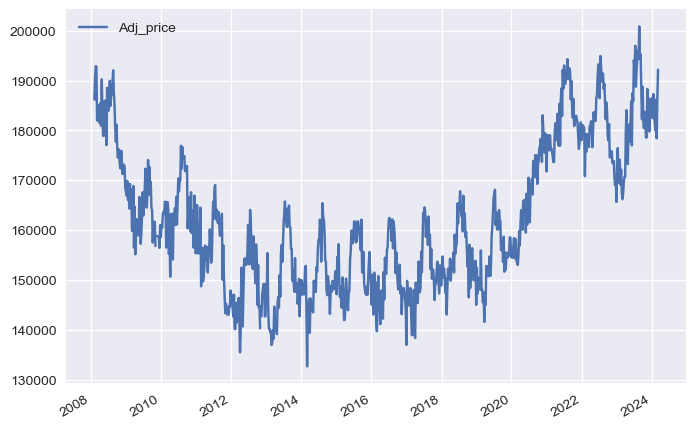

In [85]:
# Remove inflation, so it is more easier for model to predict housing price.
# Make Adjusted Price = Price / inflation measure (CPI * 100)
# Price data is the amount homes sold for that week

price_data["Adj_price"] = price_data["Price"] / price_data["CPI"] * 100
price_data.plot.line(y="Adj_price", use_index=True);

In [86]:
#Value data is the zillow computed average value of all houses in the US

price_data["Adj_Value"] = price_data["Value"] / price_data["CPI"] * 100

# Target - next quater price change
# Use pandas Shift method to pull data 13 weeks ahead and assign to next_quarter
price_data["Next_quarter"] = price_data["Adj_price"].shift(-13)
price_data

,Interest Rate,CPI,Rental Vacancy,Price,Value,Adj_price,Adj_Value,Next_quarter
2008-02-02,5.68,212.174,10.1,395000.0,450341.819589,186167.956489,212251.180441,178896.69529
2008-02-09,5.67,212.687,10.1,405917.0,450341.819589,190851.815109,211739.231636,178896.69529
2008-02-16,5.72,212.687,10.1,410250.0,450341.819589,192889.081138,211739.231636,185866.696405
2008-02-23,6.04,212.687,10.1,410000.0,450341.819589,192771.537518,211739.231636,185989.833092
2008-03-01,6.24,212.687,10.1,387000.0,445156.800352,181957.524437,209301.367903,181220.028995
...,...,...,...,...,...,...,...,...
2024-02-10,6.64,311.054,6.6,560000.0,644510.788421,180033.048924,207202.2184,None
2024-02-17,6.77,311.054,6.6,579000.0,644510.788421,186141.313084,207202.2184,None
2024-02-24,6.90,311.054,6.6,555000.0,644510.788421,178425.610987,207202.2184,None
2024-03-02,6.94,311.054,6.6,580000.0,652100.187384,186462.800671,209642.115962,None


In [87]:
nan_df = price_data.tail(13)
nan_df

,Interest Rate,CPI,Rental Vacancy,Price,Value,Adj_price,Adj_Value,Next_quarter
2023-12-16,6.95,308.742,6.6,574900.0,640361.830756,186207.253953,207410.015727,None
2023-12-23,6.67,308.742,6.6,575000.0,640361.830756,186239.643456,207410.015727,None
2023-12-30,6.61,308.742,6.6,570000.0,640361.830756,184620.168296,207410.015727,None
2024-01-06,6.62,309.685,6.6,577500.0,640944.434908,186479.81013,206966.57407,None
2024-01-13,6.66,309.685,6.6,565000.0,640944.434908,182443.450603,206966.57407,None
2024-01-20,6.60,309.685,6.6,580000.0,640944.434908,187287.082035,206966.57407,None
2024-01-27,6.69,309.685,6.6,576500.0,640944.434908,186156.901368,206966.57407,None
2024-02-03,6.63,311.054,6.6,565000.0,644510.788421,181640.486861,207202.2184,None
2024-02-10,6.64,311.054,6.6,560000.0,644510.788421,180033.048924,207202.2184,None
2024-02-17,6.77,311.054,6.6,579000.0,644510.788421,186141.313084,207202.2184,None


In [88]:
# Drop last 13 rows because there are no future data. 
# This will allow our upcoming model to train the data and compare with future values

price_data.dropna(inplace=True) 

In [89]:
price_data

,Interest Rate,CPI,Rental Vacancy,Price,Value,Adj_price,Adj_Value,Next_quarter
2008-02-02,5.68,212.174,10.1,395000.0,450341.819589,186167.956489,212251.180441,178896.69529
2008-02-09,5.67,212.687,10.1,405917.0,450341.819589,190851.815109,211739.231636,178896.69529
2008-02-16,5.72,212.687,10.1,410250.0,450341.819589,192889.081138,211739.231636,185866.696405
2008-02-23,6.04,212.687,10.1,410000.0,450341.819589,192771.537518,211739.231636,185989.833092
2008-03-01,6.24,212.687,10.1,387000.0,445156.800352,181957.524437,209301.367903,181220.028995
...,...,...,...,...,...,...,...,...
2023-11-04,7.76,308.024,6.6,550000.0,639241.206992,178557.514999,207529.675283,180033.048924
2023-11-11,7.50,308.024,6.6,550000.0,639241.206992,178557.514999,207529.675283,186141.313084
2023-11-18,7.44,308.024,6.6,580000.0,639241.206992,188297.015817,207529.675283,178425.610987
2023-12-02,7.22,308.024,6.6,570000.0,640361.830756,185050.515544,207893.485818,186462.800671


In [90]:
# True (1) or False (0)
# Check if next quarter price changed increased or decreased. (1 - increase | 0 - no change)
price_data["Change"] = (price_data["Next_quarter"] > price_data["Adj_price"]).astype(int)
price_data

,Interest Rate,CPI,Rental Vacancy,Price,Value,Adj_price,Adj_Value,Next_quarter,Change
2008-02-02,5.68,212.174,10.1,395000.0,450341.819589,186167.956489,212251.180441,178896.69529,0
2008-02-09,5.67,212.687,10.1,405917.0,450341.819589,190851.815109,211739.231636,178896.69529,0
2008-02-16,5.72,212.687,10.1,410250.0,450341.819589,192889.081138,211739.231636,185866.696405,0
2008-02-23,6.04,212.687,10.1,410000.0,450341.819589,192771.537518,211739.231636,185989.833092,0
2008-03-01,6.24,212.687,10.1,387000.0,445156.800352,181957.524437,209301.367903,181220.028995,0
...,...,...,...,...,...,...,...,...,...
2023-11-04,7.76,308.024,6.6,550000.0,639241.206992,178557.514999,207529.675283,180033.048924,1
2023-11-11,7.50,308.024,6.6,550000.0,639241.206992,178557.514999,207529.675283,186141.313084,1
2023-11-18,7.44,308.024,6.6,580000.0,639241.206992,188297.015817,207529.675283,178425.610987,0
2023-12-02,7.22,308.024,6.6,570000.0,640361.830756,185050.515544,207893.485818,186462.800671,1


In [91]:
#Check how many price changes are there
price_data["Change"].value_counts()

Change
0    411
1    386
Name: count, dtype: int64

In [92]:
# list of predictors to make prediction (change)
predictors = ["Interest Rate", "Rental Vacancy", "Adj_price", "Adj_Value"]
target = "Change"

In [93]:
#import sklearn library (RandomForestClassifier - model) | (accuracy_score = judges the percentage of the model accuracy)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

In [94]:
START = 260 #5 years (52 weeks * 5)
STEP = 52 #1 year (52 weeks)

# function to make prediction - takes in training and testing set, predictors and target
def prediction(train, test, predictors, target):
    # initialize model 
    # min_sample_split - protects against overfitting by preventing the nodes from splitting too deeply in the Random forest tree
    # random_state (randomize data - but used to recreate same randomization in another machine)
    rf= RandomForestClassifier(min_samples_split=10, random_state=1)
    rf.fit(train[predictors], train[target]) #fit model by passing in data
    preds=rf.predict(test[predictors]) #generate predictions using test set
    return preds

# Because data is Time series - Cross validation will not be accurate because it uses future data to predict the past
# Backtesting allows to generate prediction but by respecting the order of data
def backtest(data, predictors, target):
    all_preds = [] #initialize list
    #Start with 5 years of data and predict the next year. (increment by 1 year each time)
    #ex. start with data from 2008-2013 --> predict 2014, next: 2008-2014 --> predict 2015 and so on until 2023
    for i in range(START, data.shape[0], STEP):
        train = price_data.iloc[:i] #train set - all data up until i
        test = price_data.iloc[i:(i+STEP)] #test set - year following i
        all_preds.append(prediction(train, test, predictors, target)) #add all predictions to list

    preds = np.concatenate(all_preds) #concatenate all predictions
    return preds, accuracy_score(data.iloc[START:][target], preds) #return predictions and accuracy

In [95]:
#Run algo backtest
preds, accuracy = backtest(price_data, predictors, target)

In [96]:
#accuracy score
accuracy

0.6685288640595903

In [97]:
# Improving Accuracy (add a few more variables to give model extra info)
# info = recent trend in home prices (take ratio current data and the average of the past year)
yearly = price_data.rolling(52, min_periods=1).mean()
yearly

,Interest Rate,CPI,Rental Vacancy,Price,Value,Adj_price,Adj_Value,Next_quarter,Change
2008-02-02,5.680000,212.174000,10.100000,395000.000000,450341.819589,186167.956489,212251.180441,178896.695290,0.000000
2008-02-09,5.675000,212.430500,10.100000,400458.500000,450341.819589,188509.885799,211995.206038,178896.695290,0.000000
2008-02-16,5.690000,212.516000,10.100000,403722.333333,450341.819589,189969.617578,211909.881238,181220.028995,0.000000
2008-02-23,5.777500,212.558750,10.100000,405291.750000,450341.819589,190670.097563,211867.218837,182412.480019,0.000000
2008-03-01,5.870000,212.584400,10.100000,401633.400000,449304.815742,188927.582938,211354.048650,182173.989815,0.000000
...,...,...,...,...,...,...,...,...,...
2023-11-04,6.725000,303.241038,6.351923,546601.692308,621424.712464,180188.671163,204908.722117,183105.148420,0.596154
2023-11-11,6.735577,303.421346,6.367308,547082.461538,621927.109760,180241.849586,204951.650691,183431.920217,0.615385
2023-11-18,6.742500,303.601654,6.382692,548140.153846,622429.507057,180482.326101,204994.579266,183552.909560,0.615385
2023-12-02,6.754231,303.781962,6.398077,549140.153846,622953.454810,180705.444852,205044.504196,183917.754682,0.634615


In [98]:
#interate through predictors and change variable name by adding year to each one. This will be added to column
yearly_ratios = [p + "_year" for p in predictors]
#ratio = predictors / yearly average predictor values
price_data[yearly_ratios] = price_data[predictors] / yearly[predictors]
#Giving indication on how the price is trending
price_data

,Interest Rate,CPI,Rental Vacancy,Price,Value,Adj_price,Adj_Value,Next_quarter,Change,Interest Rate_year,Rental Vacancy_year,Adj_price_year,Adj_Value_year
2008-02-02,5.68,212.174,10.1,395000.0,450341.819589,186167.956489,212251.180441,178896.69529,0,1.000000,1.000000,1.0,1.0
2008-02-09,5.67,212.687,10.1,405917.0,450341.819589,190851.815109,211739.231636,178896.69529,0,0.999119,1.000000,1.012423,0.998793
2008-02-16,5.72,212.687,10.1,410250.0,450341.819589,192889.081138,211739.231636,185866.696405,0,1.005272,1.000000,1.015368,0.999195
2008-02-23,6.04,212.687,10.1,410000.0,450341.819589,192771.537518,211739.231636,185989.833092,0,1.045435,1.000000,1.011021,0.999396
2008-03-01,6.24,212.687,10.1,387000.0,445156.800352,181957.524437,209301.367903,181220.028995,0,1.063032,1.000000,0.963107,0.990288
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-04,7.76,308.024,6.6,550000.0,639241.206992,178557.514999,207529.675283,180033.048924,1,1.153903,1.039055,0.990948,1.012791
2023-11-11,7.50,308.024,6.6,550000.0,639241.206992,178557.514999,207529.675283,186141.313084,1,1.113490,1.036545,0.990655,1.012579
2023-11-18,7.44,308.024,6.6,580000.0,639241.206992,188297.015817,207529.675283,178425.610987,0,1.103448,1.034046,1.043299,1.012367
2023-12-02,7.22,308.024,6.6,570000.0,640361.830756,185050.515544,207893.485818,186462.800671,1,1.068960,1.031560,1.024045,1.013894


In [99]:
#check accuracy
preds, accuracy = backtest(price_data, predictors + yearly_ratios, target)
accuracy

0.6629422718808193

In [100]:
#compare predictive values to actual values
# pred_match = True (both values are the same) | False (either value do not match)
pred_match = (preds == price_data[target].iloc[START:])

In [101]:
import warnings
warnings.filterwarnings("ignore")

# If price match assign color to green, if price do not match assign color to red
pred_match[pred_match == True] = "green"
pred_match[pred_match == False] = "red"

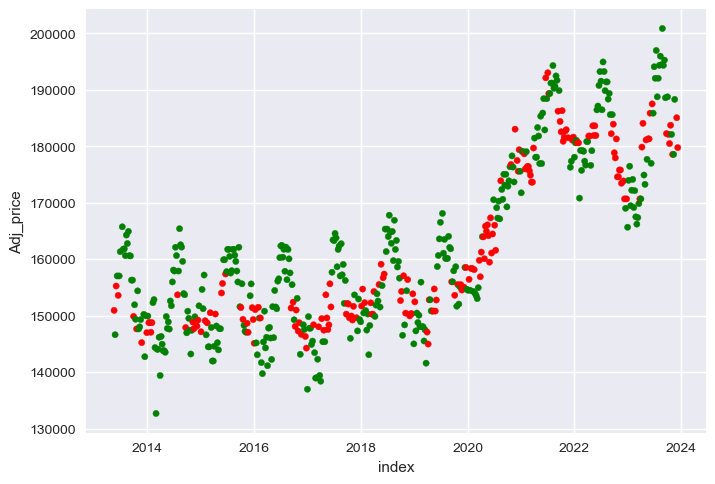

In [102]:
#plot data_matches (accurate and inaccurate matches)
import matplotlib.pyplot as plt

plot_data = price_data.iloc[START:].copy()
plot_data.reset_index().plot.scatter("index", y="Adj_price", color=pred_match);

In [103]:
#check which columns did the model find most helpful
from sklearn.inspection import permutation_importance

rf = RandomForestClassifier(min_samples_split=10, random_state=1)
rf.fit(price_data[predictors], price_data[target])

result = permutation_importance(rf, price_data[predictors], price_data[target], n_repeats=10, random_state=1)

In [104]:
result["importances_mean"]

array([0.10740276, 0.19410289, 0.29874529, 0.13801757])

In [105]:
predictors

['Interest Rate', 'Rental Vacancy', 'Adj_price', 'Adj_Value']

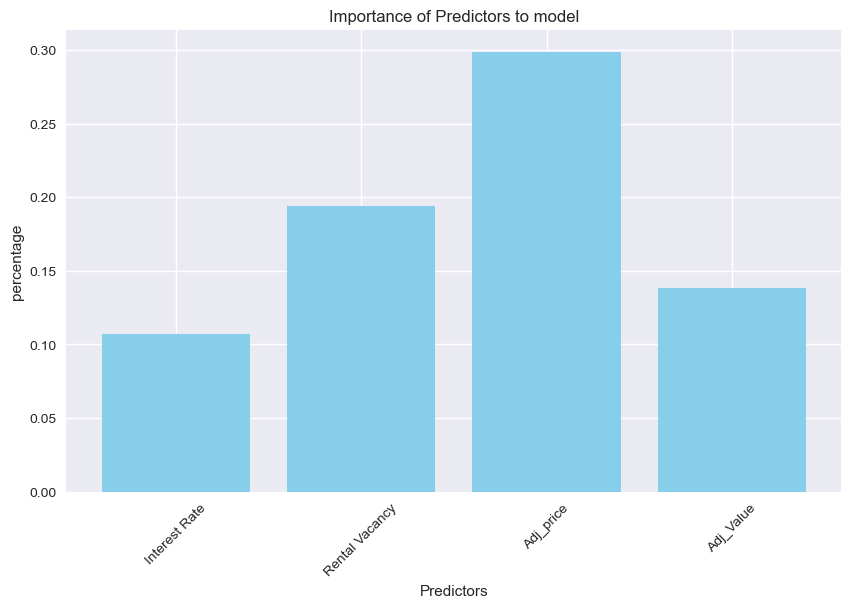

In [106]:
plt.figure(figsize=(10, 6))
plt.bar(predictors, result["importances_mean"], color='skyblue')
plt.xlabel('Predictors')
plt.ylabel('percentage')
plt.title('Importance of Predictors to model')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()